### Author: Himanshu Raj

# The Spark Foundation
### Linear Regression with Python Scikit Learn
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

### Task
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

#### What is Linear Regression
Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 

(1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable? 

(2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Reading data from given link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Info About the dataset
    Hours: No of hours a perticular student studies
    Scores : Marks scored by the student

In [3]:
df.shape

(25, 2)

### Check for any null values

In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### No null values found

### Checking the data type of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### We found that all columns have numerical data type

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### The above table shows following information:
    -> Each student studies on an average 5.01 hours
    -> Each student Scores an average 51.48 marks
    -> For hour column the standard deviation is 2.52 and for score it is 25.29
    -> The min hour a student studies is 1.1 hour and the min score of any student is 17
    -> The maximum hours any student studies is 9.2 Hours and the maximum marks that any student has got is 95

### Let us assign some grading system based on scores
    A : 90-100
    B : 80 - 89
    C : 60 - 79
    D : 35 - 59
    F : Less than 35

In [7]:
df.loc[df['Scores']>=90,'Grade'] = 'A'
df.loc[(df['Scores']<90) & (80<=df['Scores']),'Grade'] = 'B'
df.loc[(df['Scores']<80) & (60<=df['Scores']),'Grade'] = 'C'
df.loc[(df['Scores']<60) & (35<=df['Scores']),'Grade'] = 'D'
df.loc[(df['Scores']<35),'Grade'] = 'F'

In [8]:
df

,Hours,Scores,Grade
0,2.5,21,F
1,5.1,47,D
2,3.2,27,F
3,8.5,75,C
4,3.5,30,F
5,1.5,20,F
6,9.2,88,B
7,5.5,60,C
8,8.3,81,B
9,2.7,25,F


### Data Visualization

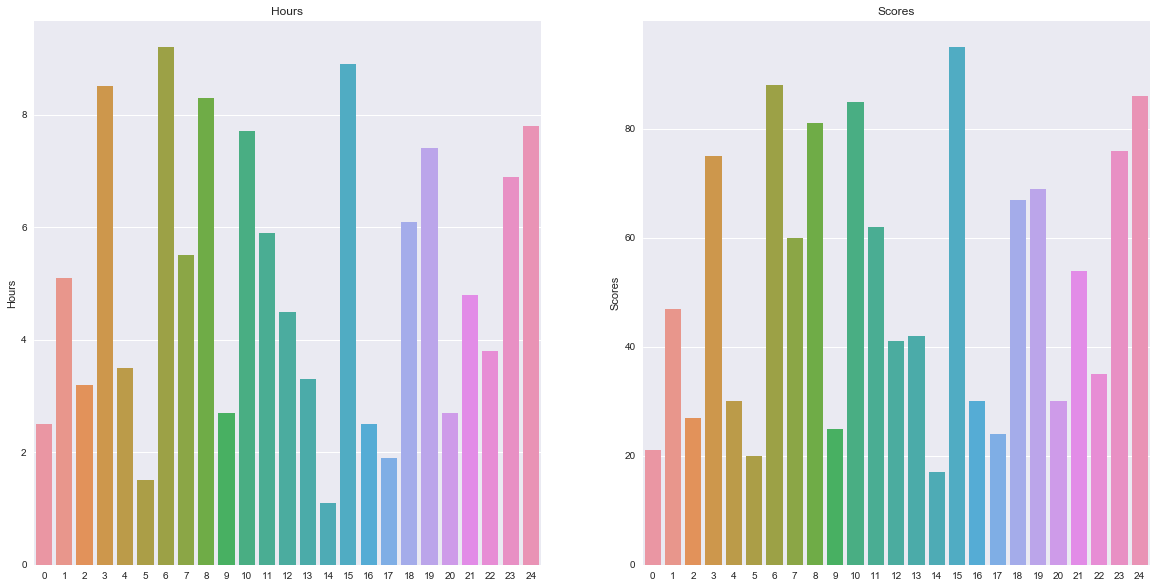

In [9]:
fig=plt.figure(figsize=(20,10))
for r in np.arange(0,2):
        data=plt.subplot(1,2,r+1,title=df.columns[r])
        sns.barplot(x=df.index,y=df[df.columns[r]],data=df)
plt.show()

### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

<Figure size 1440x720 with 0 Axes>

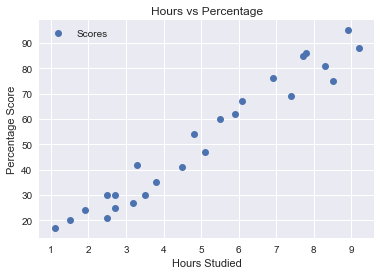

In [10]:
# Plotting the distribution of scores
plt.figure(figsize=(20,10))
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From above Distribution plot we can conclude that there is a clear linear relation between Scores and Hours.
i.e More a student studie more his/her score will be. So. we can use linear relation for our dataset.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = df.iloc[:, :-2].values  
y = df.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

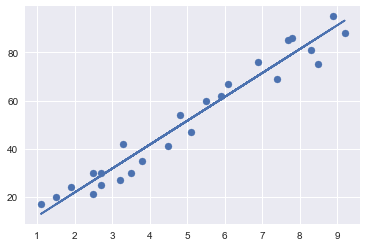

In [14]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [19]:
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 

Mean Squared Error: 21.598769307217406
